In this ICP we will build 2 feed forward network.

>Auto Encoder

>CNN

>Data Set

>> This is a cifar10 dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.




Auto Encoders:

>>Data compression is a big topic that’s used in computer vision, computer networks, computer architecture, and many other fields.The point of data compression is to convert our input into a smaller representation that we recreate, to a degree of quality. This smaller representation is what would be passed around, and, when anyone needed the original, they would reconstruct it from the smaller representation.Autoencoders are unsupervised neural networks that use machine learning to do this compression 


In [67]:
# ref for the dataset : https://keras.io/api/datasets

from keras.layers import Layer, Input, Dense, ActivityRegularization, Reshape
from keras.models import Model, Sequential
from keras.datasets import cifar10
 
import numpy as np
import matplotlib.pyplot as plt

Load  cifar10 handwritten digits dataset.

There is no need to load labels because autoencoders are unsupervised.

Rescale our images from 0 – 255 to 0 – 1 and flatten them out.


In [68]:
#Notice that we’re not loading any of the labels because autoencoders are unsupervised
(X_train, _), (X_test, _) = cifar10.load_data()
# rescale our images from 0 – 255 to 0 – 1 and flatten them out.
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [69]:
X_train.shape

(50000, 3072)

In [70]:
X_test.shape

(10000, 3072)

In [71]:
INPUT_SIZE = 3072
ENCODING_SIZE = 128

Create autoencoder
	
Use ReLU  activation functions 

create constants for our input size and our encoding size. 

reduce our input from 3072 -> 2048 -> 1024 -> 512 -> 256 -> 128, encoder path

then expand it back up  128 -> 256 -> 512 -> 1024 -> 2048 -> 3072, decoder path


In [72]:
#reduce our input from 3072 -> 2048 -> 1024 -> 512 -> 256 -> 128  (encoder path), then expand it back up 128 -> 256 -> 512 -> 1024 -> 2048 -> 3072(decoder path).
# Also notice the relu activation function
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(3072, activation='relu')(input_img)
encoded = Dense(2048, activation='relu')(encoded)
encoded = Dense(1024, activation='relu')(encoded)
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)

In [73]:
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(2048, activation='relu')(decoded)
decoded = Dense(3072, activation='relu')(decoded)
decoded = Dense(INPUT_SIZE, activation='relu')(decoded)


In [74]:
autoencoder = Model(input_img, decoded)

Training the model and then making the prediction 

Build and train the model.

Use the ADAM optimizer and mean squared error loss (the Euclidean distance/loss) between the input and reconstruction

encode and decode the test set to see how well model is performing



In [75]:
#using ADAM optimizer and mean squared error loss (the Euclidean distance/loss) between the input and reconstruction
autoencoder.compile(optimizer='adam', loss='mean_squared_error',)
af= autoencoder.fit(X_train, X_train, epochs=50, batch_size=512, shuffle=True, validation_split=0.5)

Epoch 1/50
49/49 [==============================] - 2s 38ms/step - loss: 0.1782 - val_loss: 0.0834
Epoch 2/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0832 - val_loss: 0.0827
Epoch 3/50
49/49 [==============================] - 2s 33ms/step - loss: 0.0824 - val_loss: 0.0702
Epoch 4/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0645 - val_loss: 0.0570
Epoch 5/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0563 - val_loss: 0.0539
Epoch 6/50
49/49 [==============================] - 2s 35ms/step - loss: 0.0529 - val_loss: 0.0481
Epoch 7/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0475 - val_loss: 0.0455
Epoch 8/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0455 - val_loss: 0.0446
Epoch 9/50
49/49 [==============================] - 2s 33ms/step - loss: 0.0443 - val_loss: 0.0431
Epoch 10/50
49/49 [==============================] - 2s 34ms/step - loss: 0.0594 - val_loss: 0.0559
Epoch 11/

In [76]:
#After our autoencoder has trained, we can try to encode and decode the test set to see how well our autoencoder can compress
decoded_imgs = autoencoder.predict(X_test)

Visvualize the results 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


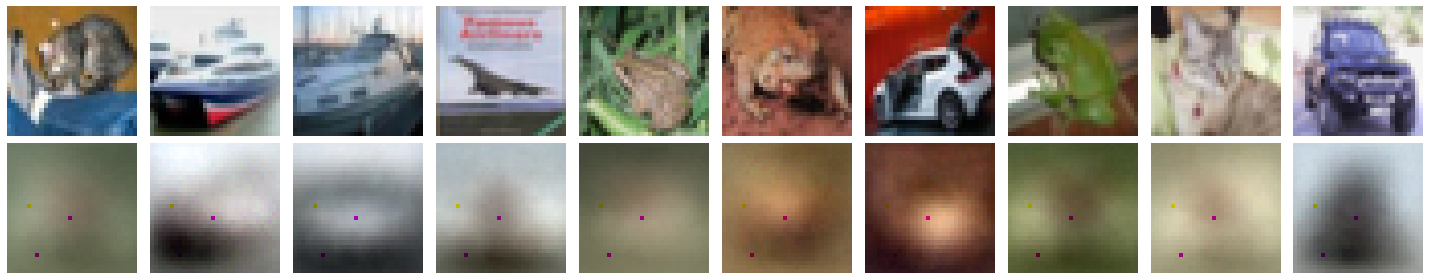

In [77]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

In [78]:
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [79]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [80]:
total_classes = 10
img_classes = ["dolphin", "shark", "chimpanzee", "elephant", "kangaroo", 
                   "camel", "rabbit", "hamster", "squirrel", "wolf"]

In [81]:
# Normalize the images.
train_images = (train_images / 255) 
test_images = (test_images / 255)

In [82]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [83]:
train_images.shape

(50000, 32, 32, 1, 3)

In [84]:
test_images.shape

(10000, 32, 32, 1, 3)

In [85]:
num_filters = 12
filter_size = 6
pool_size = 2

In [86]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(train_images.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(total_classes, activation='sigmoid'))

In [87]:
# Compile the model.
model.compile(
  'adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

In [88]:
# Train the model.
mf= model.fit(train_images, train_labels, validation_data= (test_images, test_labels), epochs=30, batch_size=512)

Epoch 1/30
98/98 [==============================] - 6s 58ms/step - loss: 2.0749 - accuracy: 0.2345 - val_loss: 1.6722 - val_accuracy: 0.4106
Epoch 2/30
98/98 [==============================] - 5s 56ms/step - loss: 1.6918 - accuracy: 0.3976 - val_loss: 1.4849 - val_accuracy: 0.4737
Epoch 3/30
98/98 [==============================] - 5s 56ms/step - loss: 1.5370 - accuracy: 0.4550 - val_loss: 1.4068 - val_accuracy: 0.5002
Epoch 4/30
98/98 [==============================] - 6s 56ms/step - loss: 1.4478 - accuracy: 0.4848 - val_loss: 1.3331 - val_accuracy: 0.5235
Epoch 5/30
98/98 [==============================] - 6s 57ms/step - loss: 1.3945 - accuracy: 0.5053 - val_loss: 1.2841 - val_accuracy: 0.5449
Epoch 6/30
98/98 [==============================] - 6s 57ms/step - loss: 1.3452 - accuracy: 0.5264 - val_loss: 1.2410 - val_accuracy: 0.5569
Epoch 7/30
98/98 [==============================] - 6s 57ms/step - loss: 1.3002 - accuracy: 0.5353 - val_loss: 1.2252 - val_accuracy: 0.5632
Epoch 8/30
98

In [89]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 1, 32)     896       
_________________________________________________________________
dropout_39 (Dropout)         (None, 32, 32, 1, 32)     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 1, 32)     9248      
_________________________________________________________________
dropout_40 (Dropout)         (None, 32, 32, 1, 32)     0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)             

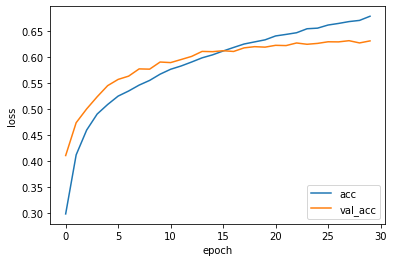

In [90]:
# plot the acc and val_acc
plt.plot(mf.history['accuracy'])
plt.plot(mf.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [94]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

In [95]:
# Print our model's predictions.
print("These are the model predictions :")
print(np.argmax(predictions, axis=1))
print("\n")

These are the model predictions :
[3 8 8 0 4]




In [96]:
# Check our predictions against the ground truths.
print("These are the corresponding labels :")
print(test_labels[:5]) 

These are the corresponding labels :
[[3]
 [8]
 [8]
 [0]
 [6]]
